In [ ]:
import numpy as np
import pandas as pd

Data is downloaded from Kaggle (https://www.kaggle.com/uciml/sms-spam-collection-dataset)

In [ ]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4322,ham,Aight well keep me informed,NaN,NaN,NaN
3175,ham,Havent still waitin as usual... ÌÏ come back s...,NaN,NaN,NaN
1004,ham,Umma. Did she say anything,NaN,NaN,NaN
3711,ham,Wat u doing there?,NaN,NaN,NaN
830,spam,U have a secret admirer. REVEAL who thinks U R...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

### 1. Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df1 =df.copy()
df1.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [ ]:
df1.sample(5)

,v1,v2
2553,ham,ÌÏ give me some time to walk there.
5501,spam,PRIVATE! Your 2003 Account Statement for 07808...
1860,ham,"It could work, we'll reach a consensus at the ..."
1587,ham,"Dont search love, let love find U. Thats why i..."
825,ham,Hmm .. Bits and pieces lol ... *sighs* ...


In [ ]:
df1.rename(columns={'v1':'target', 'v2': 'text'}, inplace=True)
df1.sample(5)

,target,text
3558,spam,URGENT! We are trying to contact U Todays draw...
3185,ham,Happy birthday to you....dear.with lots of lov...
4641,spam,You are being ripped off! Get your mobile cont...
4157,ham,It certainly puts things into perspective when...
2698,spam,FROM 88066 LOST å£12 HELP


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

df1['target']= encoder.fit_transform(df1['target'])

In [ ]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df1.isnull().sum()

,0
target,0
text,0


In [ ]:
df1.duplicated().sum()

np.int64(403)

In [ ]:
df1 = df1.drop_duplicates(keep='first')

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.shape

(5169, 2)

### 2. EDA

In [ ]:
df1['target'].value_counts()

,count
target,
0,4516
1,653


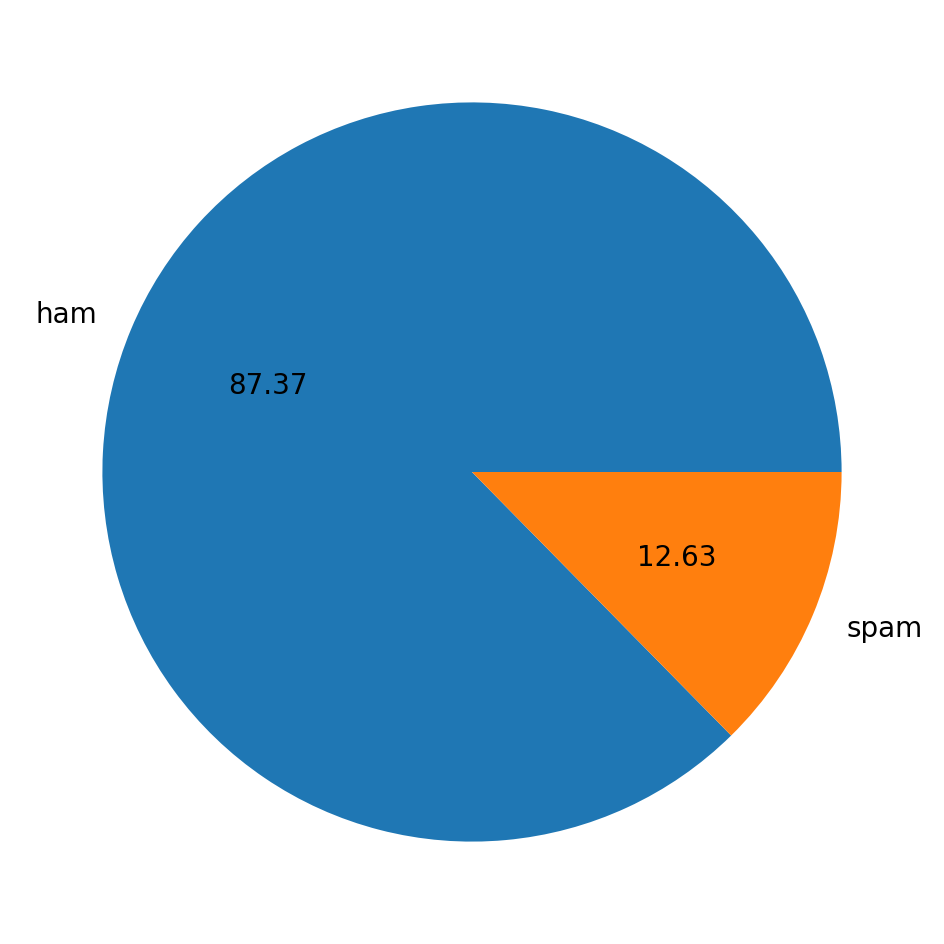

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size':20})
plt.pie(df1['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
#Target label is inbalanced. Ham values are more than spam values.

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df1['num_character']= df1.text.apply(len)

In [ ]:
df1.sample(5)

,target,text,num_character
4153,0,Haf u eaten? Wat time u wan me 2 come?,38
3916,0,Eh ur laptop got no stock lei... He say mon mu...,88
4523,0,I've sent Ì_ my part..,22
4561,0,How much u trying to get?,25
1393,0,Oh ok..,7


In [ ]:
df1['num_words']= df1.text.apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df1.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df1['num_sentences']= df1.text.apply(lambda x: len(nltk.sent_tokenize(x)))
df1.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df1.describe()

,target,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
df1[df1.target==0].describe().drop(columns='target')

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df1[df1.target==1].describe().drop(columns='target')

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Visualization

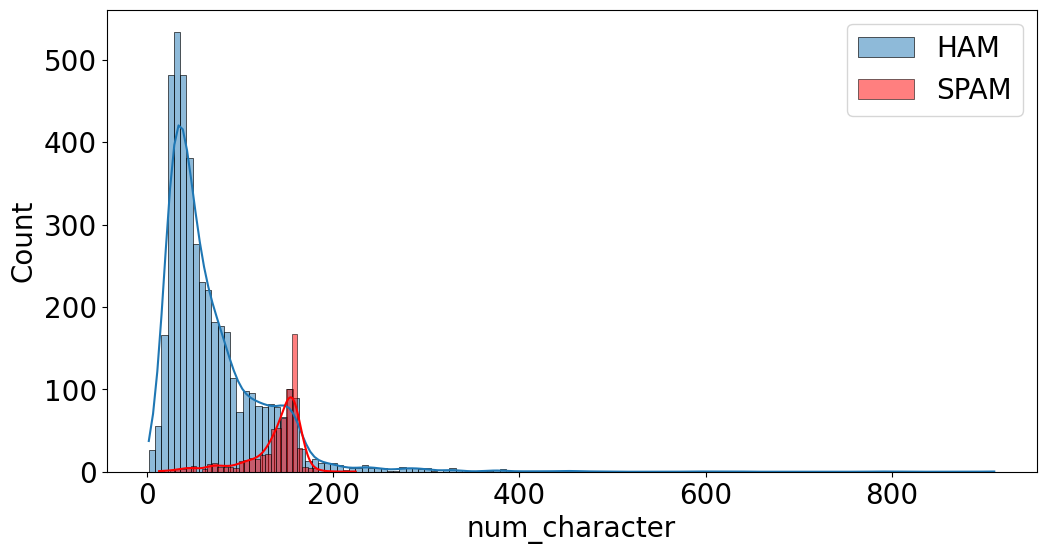

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df1[df1.target==0]['num_character'],label='HAM',kde=True)
sns.histplot(df1[df1.target==1]['num_character'],color='red',label='SPAM',kde=True)
plt.legend()

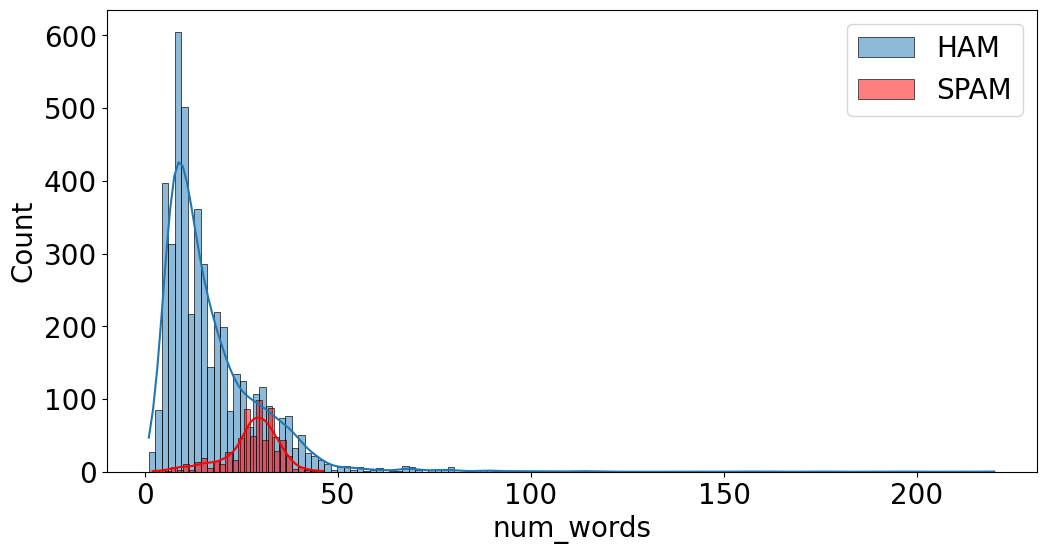

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1.target==0]['num_words'],label='HAM',kde=True)
sns.histplot(df1[df1.target==1]['num_words'],color='red',label='SPAM',kde=True)
plt.legend()

In [ ]:
df1.select_dtypes(include=['int64','float64']).corr()

,target,num_character,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_character,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Figure size 1500x1000 with 0 Axes>

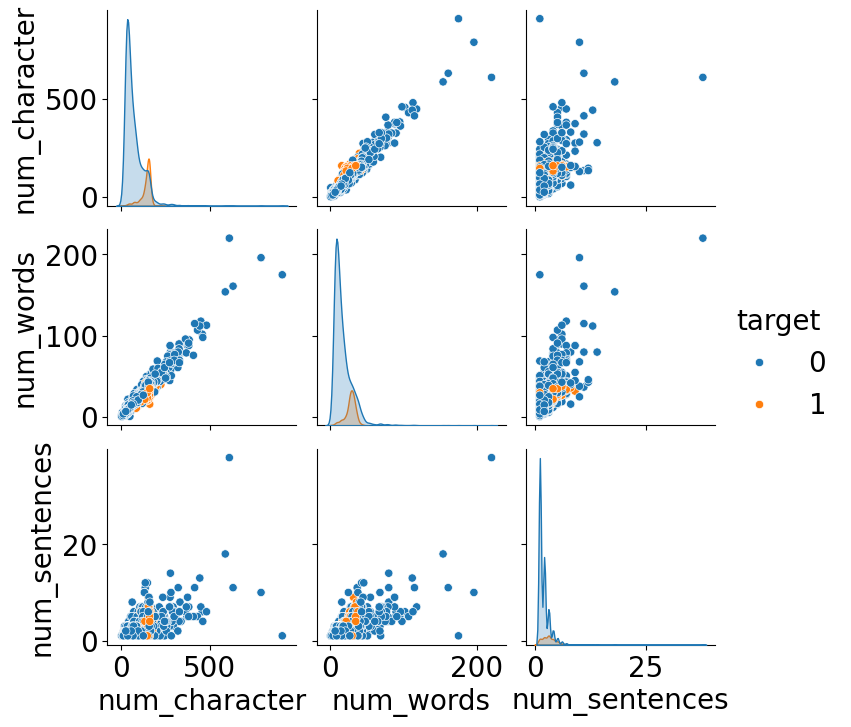

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df1, hue='target')

<Axes: >

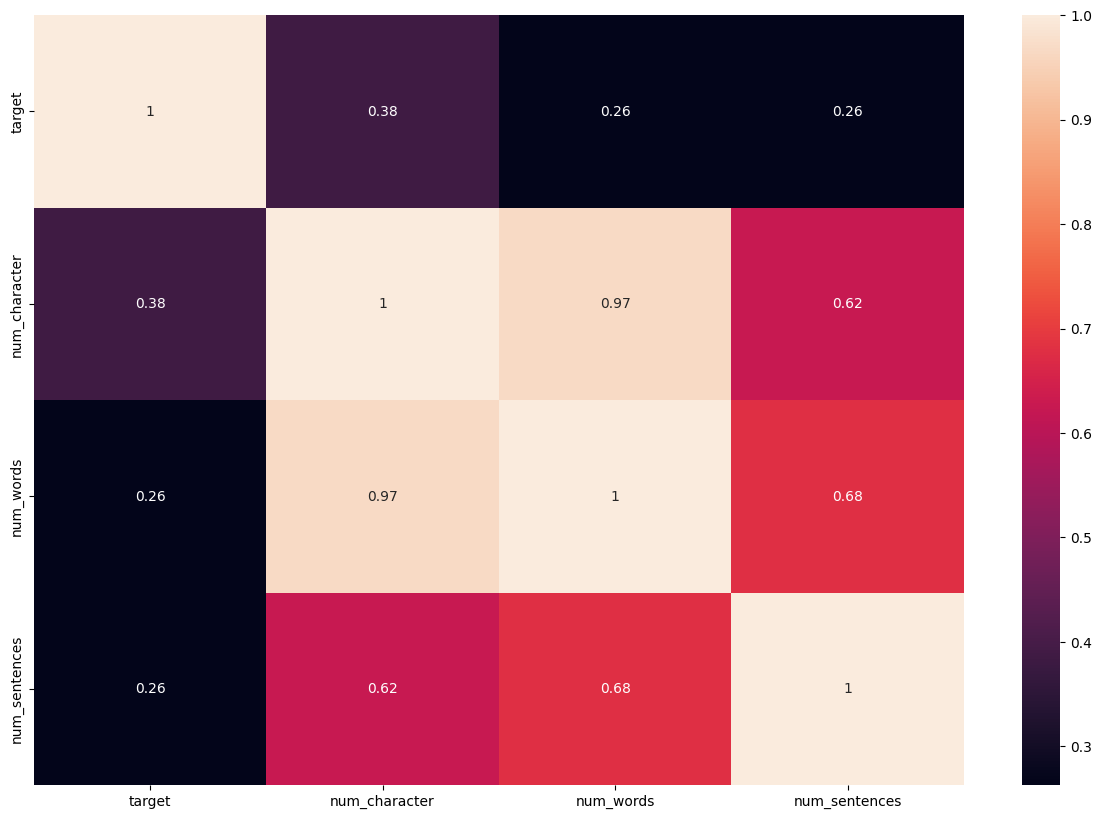

In [ ]:
numeric_df = df1.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(),annot=True)

### 3. Data preprocessing

*   Lower Case
*   Tokenization
*   Removing special characters
*   Removing stop words and punctuation
*   Stemming

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def transform_text(text):
    text =  text.lower()
    text =  nltk.word_tokenize(text)
    ps = PorterStemmer()
    y=[]
    k=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    for j in y:
        if j not in stopwords.words('english') and j not in string.punctuation:
            k.append(j)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [ ]:
df1.text[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
df1['transformed_text'] =  df1['text'].apply(transform_text)

In [ ]:
df1.transformed_text.head()

,transformed_text
0,go until jurong point crazi avail onli in bugi...
1,ok lar joke wif u oni
2,free entri in 2 a wkli comp to win fa cup fina...
3,u dun say so earli hor u c alreadi then say
4,nah i do think he goe to usf he live around he...


In [ ]:
from wordcloud import WordCloud

In [ ]:
wc = WordCloud(width=1000, height=1000, min_font_size=14, background_color='white')

In [ ]:
spam_wc= wc.generate(df1[df1['target']==1]['transformed_text'].str.cat(sep=' '))

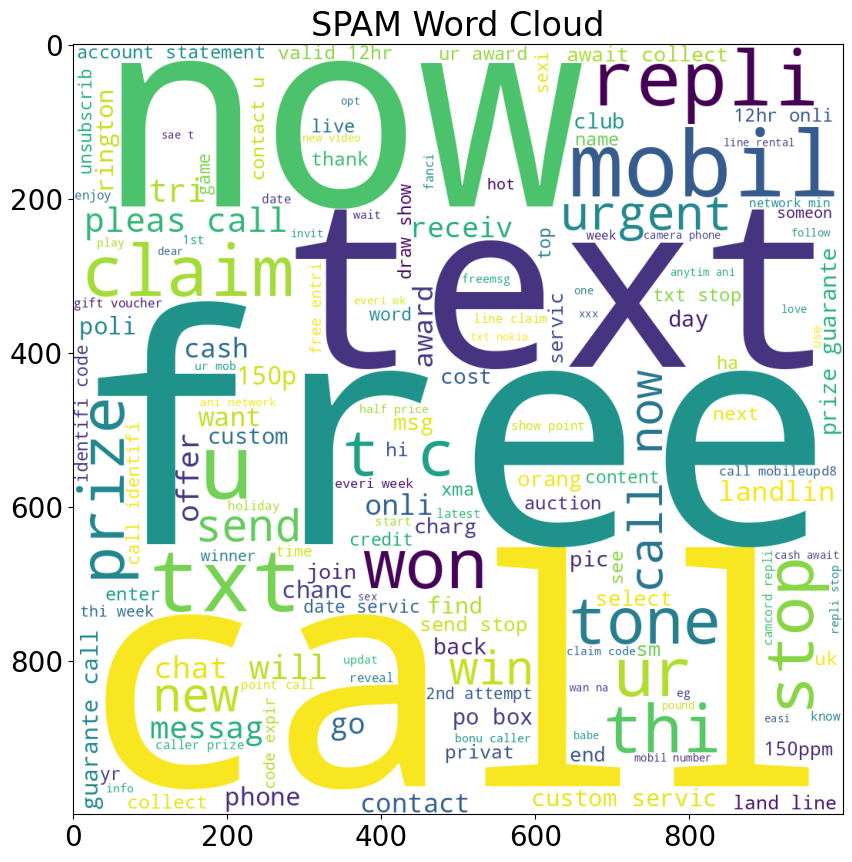

In [ ]:
plt.figure(figsize=(15,10))
plt.title('SPAM Word Cloud')
plt.imshow(spam_wc)

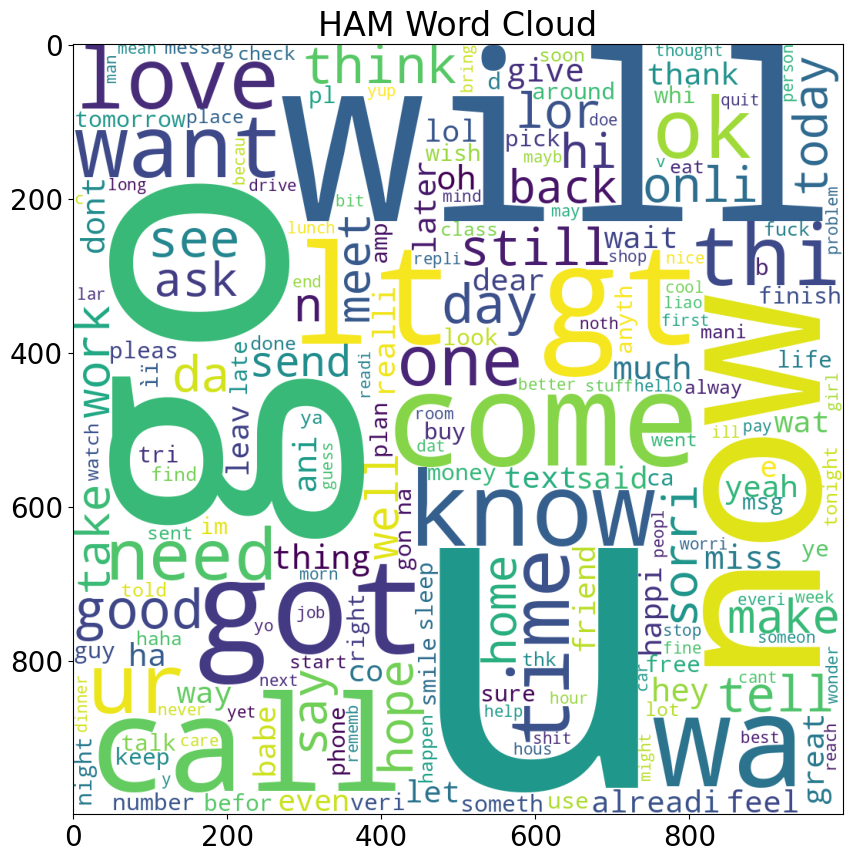

In [ ]:
ham_wc= wc.generate(df1[df1['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15,10))
plt.title('HAM Word Cloud')
plt.imshow(ham_wc)

In [ ]:
ham_corp = []
for msg in df1[df1['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corp.append(word)

In [ ]:
spam_corp=[]
for msg in df1[df1['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corp.append(word)

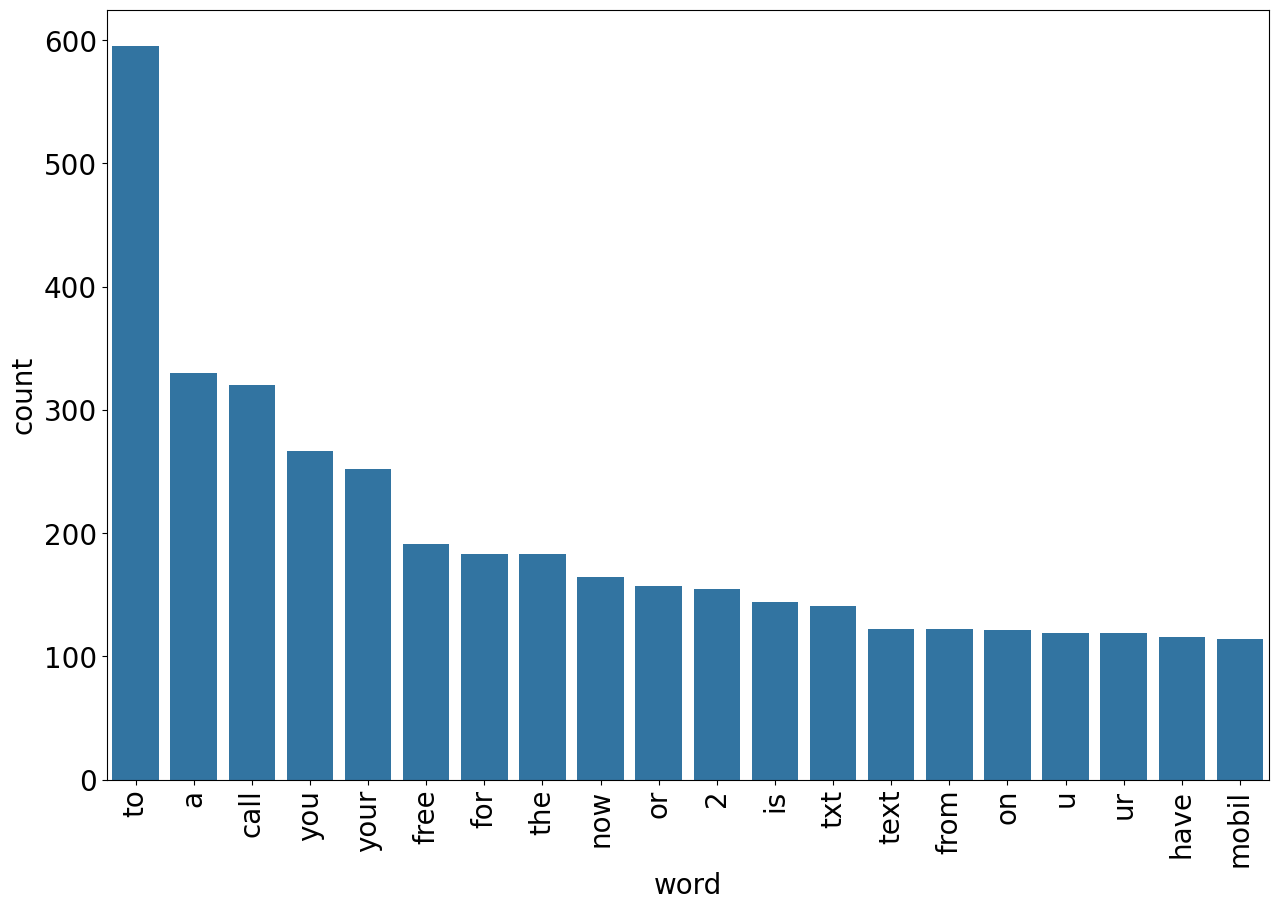

In [ ]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corp).most_common(20))
spam_df.columns = ['word', 'count']
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':20})
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

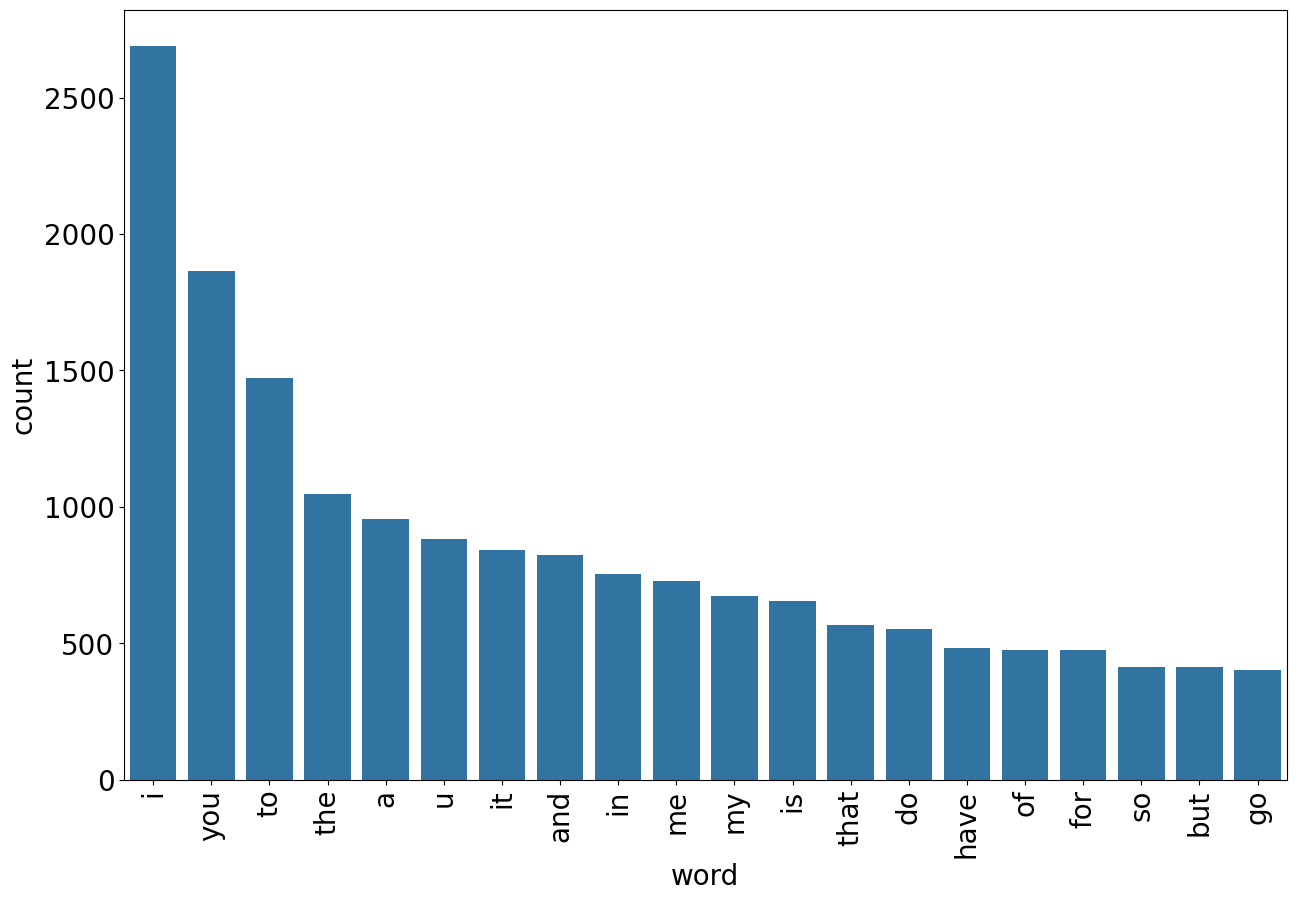

In [ ]:
ham_df = pd.DataFrame(Counter(ham_corp).most_common(20))
ham_df.columns = ['word', 'count']
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size':20})
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()

### 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df1['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 6796)

In [ ]:
Y =df1.target.values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_pred1 =  gnb.predict(x_test)
print ('Accuracy Score GNB')
print(accuracy_score(y_test, y_pred1))
print ('---------------------------------')
print ('CM')
print (confusion_matrix(y_test, y_pred1))
print ('---------------------------------')
print ('Precision Score')
print (precision_score(y_test, y_pred1))

Accuracy Score GNB
0.8887814313346228
---------------------------------
CM
[[801  95]
 [ 20 118]]
---------------------------------
Precision Score
0.5539906103286385


In [ ]:
mnb.fit(x_train, y_train)
y_pred2 =  mnb.predict(x_test)
print ('Accuracy Score MNB')
print(accuracy_score(y_test, y_pred2))
print ('---------------------------------')
print ('CM')
print (confusion_matrix(y_test, y_pred2))
print ('---------------------------------')
print ('Precision Score')
print (precision_score(y_test, y_pred2))

Accuracy Score MNB
0.9671179883945842
---------------------------------
CM
[[874  22]
 [ 12 126]]
---------------------------------
Precision Score
0.8513513513513513


In [ ]:
bnb.fit(x_train, y_train)
y_pred3 =  bnb.predict(x_test)
print ('Accuracy Score BNB')
print (accuracy_score(y_test, y_pred3))
print ('---------------------------------')
print ('CM')
print (confusion_matrix(y_test, y_pred3))
print ('---------------------------------')
print ('Precision Score')
print (precision_score(y_test, y_pred3))

Accuracy Score BNB
0.9748549323017408
---------------------------------
CM
[[893   3]
 [ 23 115]]
---------------------------------
Precision Score
0.9745762711864406


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df1['transformed_text']).toarray()
Y =df1.target.values
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
gnb.fit(x_train, y_train)
y_pred1 =  gnb.predict(x_test)
print ('Accuracy Score GNB')
print(accuracy_score(y_test, y_pred1))
print ('---------------------------------')
print ('CM')
print (confusion_matrix(y_test, y_pred1))
print ('---------------------------------')
print ('Precision Score')
print (precision_score(y_test, y_pred1))

Accuracy Score GNB
0.8829787234042553
---------------------------------
CM
[[800  96]
 [ 25 113]]
---------------------------------
Precision Score
0.5406698564593302


In [ ]:
mnb.fit(x_train, y_train)
y_pred2 =  mnb.predict(x_test)
print ('Accuracy Score MNB')
print(accuracy_score(y_test, y_pred2))
print ('---------------------------------')
print ('CM')
print (confusion_matrix(y_test, y_pred2))
print ('---------------------------------')
print ('Precision Score')
print (precision_score(y_test, y_pred2))

Accuracy Score MNB
0.9690522243713733
---------------------------------
CM
[[896   0]
 [ 32 106]]
---------------------------------
Precision Score
1.0


In [ ]:
bnb.fit(x_train, y_train)
y_pred3 =  bnb.predict(x_test)
print ('Accuracy Score BNB')
print (accuracy_score(y_test, y_pred3))
print ('---------------------------------')
print ('CM')
print (confusion_matrix(y_test, y_pred3))
print ('---------------------------------')
print ('Precision Score')
print (precision_score(y_test, y_pred3))

Accuracy Score BNB
0.9825918762088974
---------------------------------
CM
[[893   3]
 [ 15 123]]
---------------------------------
Precision Score
0.9761904761904762


We want our classifier to be more precise than overall accuracy as the dataset is inbalanced.

Therefore, we would go with MLB naive Bayes as precision score is the highest with TF-IDF vectorizer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [ ]:
accuracy_s=[]
precision_s=[]

for name, clf in clfs.items():
    accuracy,precision = train_classifier(clf,x_train, y_train,x_test,y_test)
    print ("For {}".format(name) + ' Classifier')
    print ("Accuracy --> {}".format(accuracy))
    print ("Precision --> {}".format(precision))
    accuracy_s.append(accuracy)
    precision_s.append(precision)

For SVC Classifier
Accuracy --> 0.9796905222437138
Precision --> 0.975609756097561
For KN Classifier
Accuracy --> 0.9148936170212766
Precision --> 1.0
For NB Classifier
Accuracy --> 0.9690522243713733
Precision --> 1.0
For DT Classifier
Accuracy --> 0.9323017408123792
Precision --> 0.8617021276595744
For LR Classifier
Accuracy --> 0.960348162475822
Precision --> 0.944954128440367
For RF Classifier
Accuracy --> 0.9738878143133463
Precision --> 1.0
For AdaBoost Classifier
Accuracy --> 0.9468085106382979
Precision --> 0.9029126213592233
For BgC Classifier
Accuracy --> 0.9661508704061895
Precision --> 0.9186991869918699
For ETC Classifier
Accuracy --> 0.9816247582205029
Precision --> 0.9917355371900827
For GBDT Classifier
Accuracy --> 0.9564796905222437
Precision --> 0.9514563106796117
For xgb Classifier
Accuracy --> 0.9845261121856866
Precision --> 0.9841269841269841


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_s,'Precision':precision_s}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.914894,1.000000
2,NB,0.969052,1.000000
5,RF,0.973888,1.000000
8,ETC,0.981625,0.991736
10,xgb,0.984526,0.984127
0,SVC,0.979691,0.975610
9,GBDT,0.956480,0.951456
4,LR,0.960348,0.944954
7,BgC,0.966151,0.918699
6,AdaBoost,0.946809,0.902913


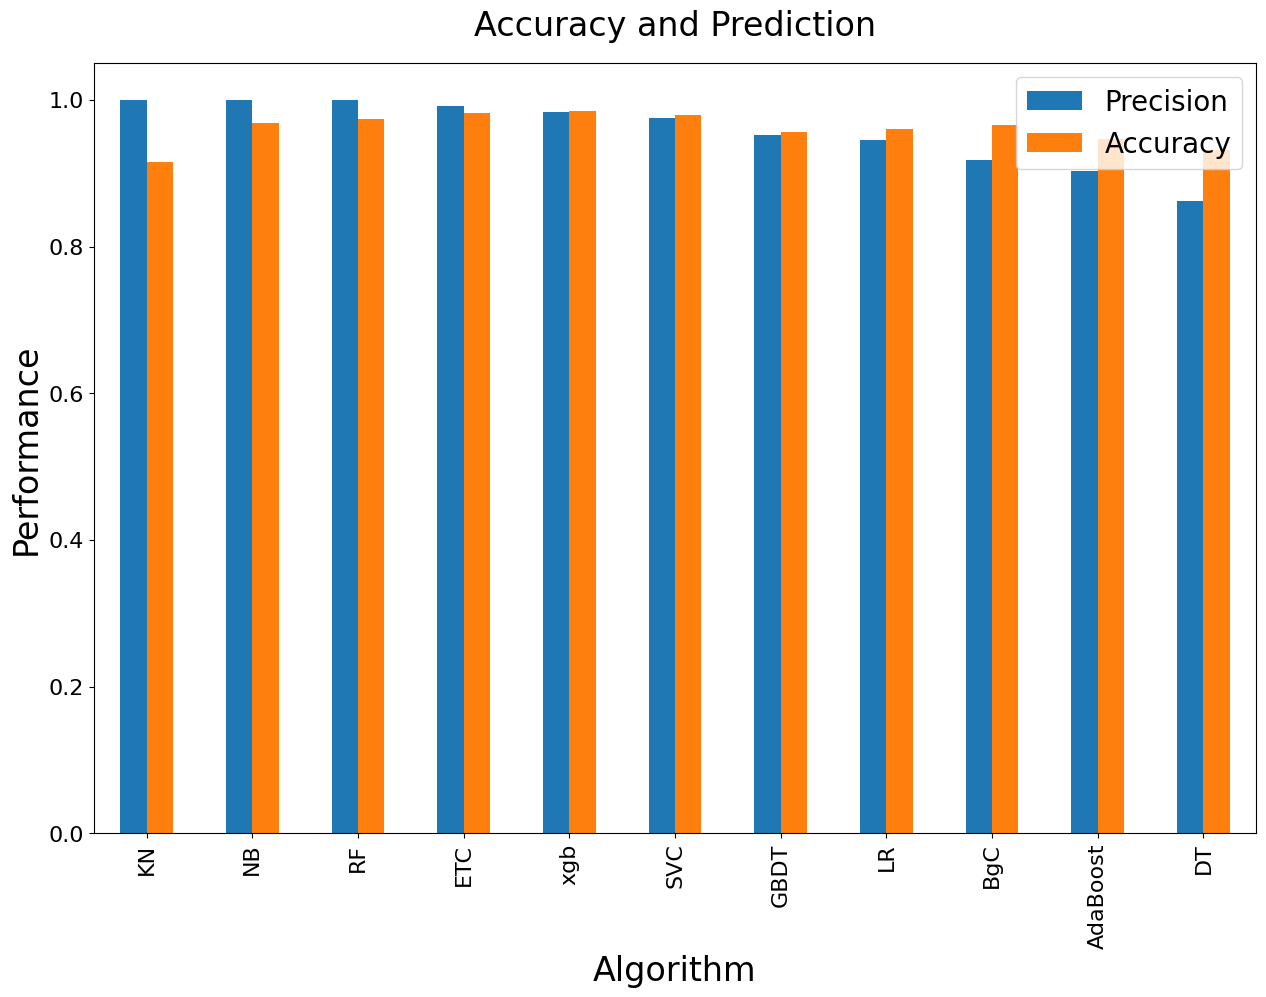

In [ ]:
ax3 = performance_df.plot(x="Algorithm", y=["Precision", "Accuracy"],kind="bar",figsize=(15, 10), fontsize=16)
ax3.set_title('Accuracy and Prediction',pad=20, fontdict={'fontsize':24})
ax3.set_ylabel('Performance', fontdict={'fontsize':24})
ax3.set_xlabel('Algorithm', fontdict={'fontsize':24})
ax3.legend(loc='upper right',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

We have chosen Naive Bayes, Extra Tree classifier and SVC as top performing classifier based on the precision score

In [ ]:
from sklearn.ensemble import VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
estimator = [('svm', svc), ('MNB', mnb), ('ETC',etc)]

In [ ]:
voting = VotingClassifier(estimator,voting='soft')

In [ ]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('MNB', MultinomialNB()),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred5 = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred5))
print("Precision",precision_score(y_test,y_pred5))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


We can use the above ensemble of classifiers but the precision is decreasing when we are trying to increase the accuracy. For now Normal MNB is working the best for us.

### Model export

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))